<a href="https://colab.research.google.com/github/Pritamyadav-14/preetamyadav-task1/blob/main/Task_1_Data_Analysis_Project_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import zipfile
import os

# Define the path to the zip file
zip_path = '/content/student.zip'

# Define the directory to extract to
extracted_path = '/content/extracted_student_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Define the path to the CSV file within the extracted directory
csv_path = os.path.join(extracted_path, 'student-mat.csv')


df = pd.read_csv(csv_path, sep=';')


display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [18]:
# Missing values per column
df.isnull().sum()

# Data types for each column
df.dtypes

# Number of rows and columns
df.shape

(395, 33)

In [19]:
import numpy as np

# Replace missing numeric values with the column median
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Confirm changes
df.isnull().sum(), df.shape

/tmp/ipython-input-19-3872823530.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


(school        0
 sex           0
 age           0
 address       0
 famsize       0
 Pstatus       0
 Medu          0
 Fedu          0
 Mjob          0
 Fjob          0
 reason        0
 guardian      0
 traveltime    0
 studytime     0
 failures      0
 schoolsup     0
 famsup        0
 paid          0
 activities    0
 nursery       0
 higher        0
 internet      0
 romantic      0
 famrel        0
 freetime      0
 goout         0
 Dalc          0
 Walc          0
 health        0
 absences      0
 G1            0
 G2            0
 G3            0
 dtype: int64,
 (395, 33))

In [20]:
avg_g3 = df['G3'].mean()
avg_g3

np.float64(10.415189873417722)

In [21]:
count_above_15 = df[df['G3'] > 15].shape[0]
count_above_15

40

In [22]:
corr_study_g3 = df['studytime'].corr(df['G3'])
corr_study_g3

np.float64(0.09781968965319626)

In [14]:
avg_by_gender = df.groupby('sex')['G3'].mean()
avg_by_gender

,G3
sex,
F,9.966346
M,10.914439


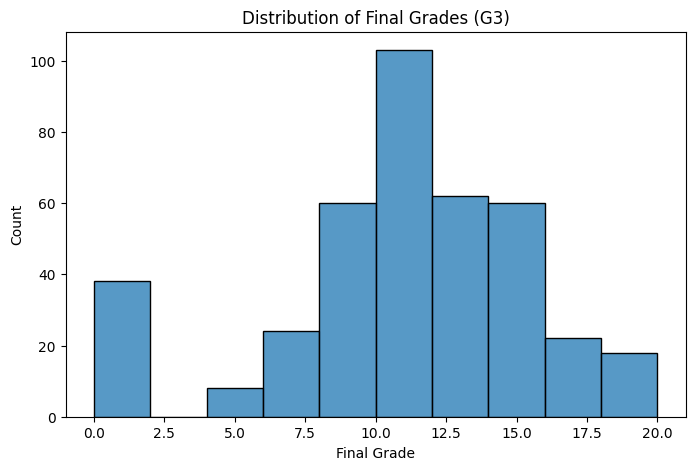

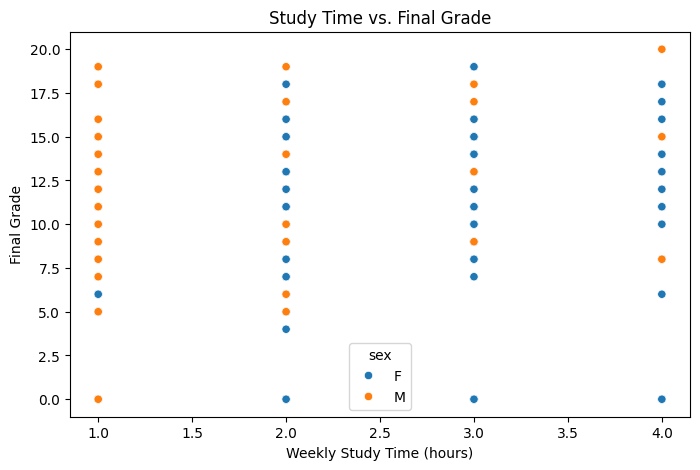

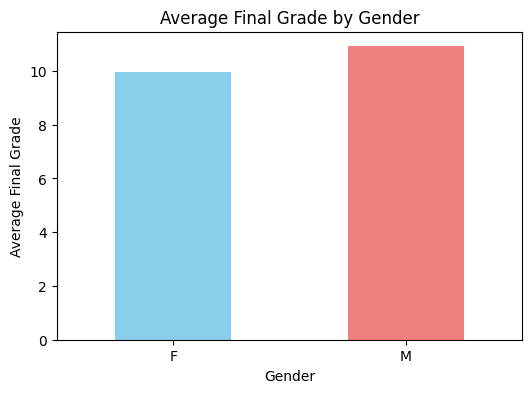

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of G3
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=10, kde=False)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

#  Scatter Plot: Study Time vs. G3
plt.figure(figsize=(8, 5))
sns.scatterplot(x='studytime', y='G3', data=df, hue='sex')
plt.title('Study Time vs. Final Grade')
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('Final Grade')
plt.show()

# Bar Chart: Average G3 by Gender
plt.figure(figsize=(6, 4))
avg_by_gender.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade')
plt.xticks(rotation=0)
plt.show()